## Equilibrium Data (EFIT / CHEASE)

### gfile (g*****.*****) -> OMFITgeqdsk, FluxSurfaces

In [1]:
import vaft
from omas import *
from vaft.code.omfit_eqdsk import OMFITeqdsk

eq = OMFITeqdsk('../vaft/data/g039020.031180')
ods = eq.to_omas()

Issues loading MdsShr, trying find_library
Configuration loaded:
Hostname: a
Username: vest
Password: vest
Database: VEST


Issues loading MdsShr, trying find_library


In [2]:
eq.keys()

['CASE',
 'NW',
 'NH',
 'RDIM',
 'ZDIM',
 'RCENTR',
 'RLEFT',
 'ZMID',
 'RMAXIS',
 'ZMAXIS',
 'SIMAG',
 'SIBRY',
 'BCENTR',
 'CURRENT',
 'FPOL',
 'PRES',
 'FFPRIM',
 'PPRIME',
 'PSIRZ',
 'QPSI',
 'NBBBS',
 'LIMITR',
 'RBBBS',
 'ZBBBS',
 'RLIM',
 'ZLIM',
 'RHOVN',
 'AuxNamelist',
 'AuxQuantities',
 'fluxSurfaces',
 '_desc']

In [16]:
eq['fluxSurfaces'].keys()

['R0',
 'Z0',
 'RCENTR',
 'R0_interp',
 'Z0_interp',
 'levels',
 'flux',
 'BCENTR',
 'avg',
 'geo',
 'midplane',
 'CURRENT',
 'info']

In [17]:
eq['fluxSurfaces'].keys()

for k in eq['fluxSurfaces'].keys():
    print(k)
    # print(eq['fluxSurfaces'][k])

R0
Z0
RCENTR
R0_interp
Z0_interp
levels
flux
BCENTR
avg
geo
midplane
CURRENT
info


In [24]:
print(eq['fluxSurfaces']['R0'])

0.3987001115058154


In [21]:
print(eq['fluxSurfaces']['geo'].keys())

# print(eq['fluxSurfaces']['info']['internal_inductance'])


['psi', 'psin', 'R', 'R_centroid', 'Rmax_centroid', 'Rmin_centroid', 'Z', 'Z_centroid', 'a', 'dell', 'delta', 'delu', 'eps', 'kap', 'kapl', 'kapu', 'lonull', 'per', 'surfArea', 'upnull', 'zeta', 'zetail', 'zetaiu', 'zetaol', 'zetaou', 'zoffset', 'vol', 'cxArea', 'phi', 'bunit', 'rho', 'rhon']


### eq.to_omas()

[0.39870011 0.39860967 0.39847384 0.39835653 0.39825306 0.39816129
 0.39805734 0.39790173 0.39783375 0.39765671 0.39760006 0.3974453
 0.39737898 0.39721222 0.39717032 0.39699427 0.39691999 0.39679813
 0.39666476 0.39659563 0.39643835 0.3963362  0.39625334 0.39608975
 0.39599695 0.39590259 0.39575822 0.39565407 0.39554992 0.3954332
 0.39531254 0.3951999  0.39508725 0.39497599 0.39485585 0.39473571
 0.3946159  0.39452018 0.39439332 0.39426645 0.39415374 0.39406163
 0.39392863 0.39379562 0.39367994 0.39358898 0.39346429 0.39332561
 0.39319982 0.39309883 0.39299785 0.39285781 0.39271702 0.39260666
 0.3924963  0.39238594 0.39224361 0.3921148  0.39199553 0.39187627
 0.391757   0.39162454 0.39149668 0.39136881 0.39124094 0.39111307
 0.39099365 0.39086354 0.39072724 0.39059094 0.39045464 0.39032793
 0.3902109  0.39006991 0.3899252  0.3897805  0.38964363 0.38951467
 0.38938571 0.38924087 0.38908766 0.38893916 0.38879806 0.38865696
 0.38851586 0.38837097 0.38821062 0.38805695 0.38790328 0.387749

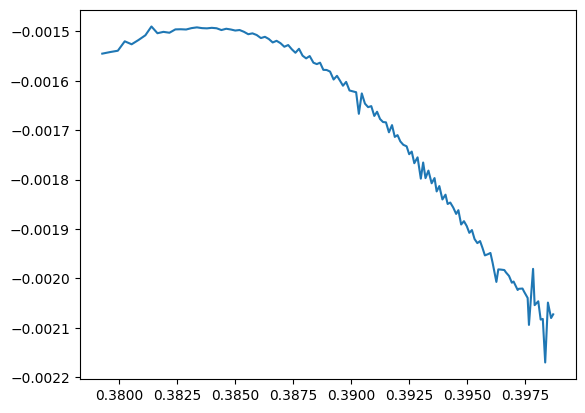

In [18]:
print(ods['equilibrium.time_slice.0.profiles_1d.geometric_axis.r'])

import matplotlib.pyplot as plt
plt.plot(ods['equilibrium.time_slice.0.profiles_1d.geometric_axis.r'], ods['equilibrium.time_slice.0.profiles_1d.geometric_axis.z'])
plt.show()





In [25]:
print(ods['equilibrium']['time_slice.0']['profiles_1d']['volume'][-1])

[0.         0.0090063  0.01791365 0.02679651 0.03561813 0.04438584
 0.05310969 0.0617851  0.07041416 0.07899432 0.08752313 0.09600481
 0.10444107 0.1128292  0.12116622 0.12945678 0.13770298 0.14590315
 0.15405438 0.16215811 0.17021569 0.17822829 0.18619649 0.19412056
 0.20200179 0.20984064 0.21763681 0.22539207 0.2331064  0.24077789
 0.24840781 0.2559974  0.26354804 0.27106133 0.27853569 0.28597127
 0.29336937 0.3007319  0.3080579  0.31534656 0.32260071 0.32982122
 0.33700706 0.34415992 0.35128124 0.3583699  0.36542733 0.37245458
 0.37945033 0.38641672 0.39335504 0.40026421 0.40714595 0.41399941
 0.42082624 0.42762789 0.43440363 0.44115491 0.44788132 0.45458442
 0.46126438 0.4679215  0.4745572  0.48117145 0.48776504 0.49433864
 0.50089315 0.50742861 0.51394577 0.5204456  0.52692865 0.53339484
 0.53984561 0.54628156 0.55270271 0.55910999 0.56550421 0.57188589
 0.57825597 0.58461499 0.59096301 0.59730125 0.60363026 0.60995091
 0.61626389 0.6225699  0.62886916 0.63516273 0.64145156 0.6477

In [23]:
ods = eq.to_omas()
ods.physics_add_phi_to_equilbrium_profiles_1d_ods(time_index=0)
ods.physics_summary_consistent_global_quantities()
ods.physics_equilibrium_consistent()
# ods.physics_add_rho_pol_norm_to_equilbrium_profiles_1d_ods(time_index=0)
def print_hierarchy(d, prefix=''):
    try:
        keys = d.keys()
    except AttributeError:
        # d가 keys()를 못 가지면 (리프노드면) 그냥 return
        return

    for k in keys:
        new_prefix = f'{prefix}.{k}' if prefix else k
        print(new_prefix)
        try:
            print_hierarchy(d[k], new_prefix)
        except Exception:
            pass  # d[k]가 keys()를 안 가지면 더 못 들어가니까 무시

print_hierarchy(ods)



equilibrium
equilibrium.time_slice
equilibrium.time_slice.0
equilibrium.time_slice.0.profiles_1d
equilibrium.time_slice.0.profiles_1d.psi
equilibrium.time_slice.0.profiles_1d.rho_tor_norm
equilibrium.time_slice.0.profiles_1d.rho_tor
equilibrium.time_slice.0.profiles_1d.r_inboard
equilibrium.time_slice.0.profiles_1d.r_outboard
equilibrium.time_slice.0.profiles_1d.volume
equilibrium.time_slice.0.profiles_1d.triangularity_upper
equilibrium.time_slice.0.profiles_1d.triangularity_lower
equilibrium.time_slice.0.profiles_1d.squareness_lower_inner
equilibrium.time_slice.0.profiles_1d.squareness_upper_inner
equilibrium.time_slice.0.profiles_1d.squareness_lower_outer
equilibrium.time_slice.0.profiles_1d.squareness_upper_outer
equilibrium.time_slice.0.profiles_1d.trapped_fraction
equilibrium.time_slice.0.profiles_1d.surface
equilibrium.time_slice.0.profiles_1d.q
equilibrium.time_slice.0.profiles_1d.pressure
equilibrium.time_slice.0.profiles_1d.phi
equilibrium.time_slice.0.profiles_1d.j_tor
equili